# Matplotlib Chart Examples

## Scatter Charts
Plus saving a chart to a file (e.g. PDF, PNG, etc.)

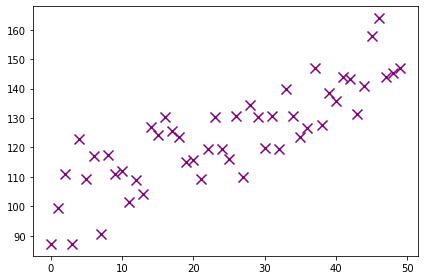

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_chart_example(x, y):
    plt.figure() # make a new current figure
    plt.scatter(x, y, marker="x", s=100, c="purple")

    # you can save a figure to a file
    plt.tight_layout() # nice function to call right before rendering
    plt.savefig("scatter_chart.pdf")
    plt.show()
    
# we need data    
x = list(range(50))
y = [np.random.normal(100, 10) + value for value in x]
scatter_chart_example(x, y)

## Bar Charts

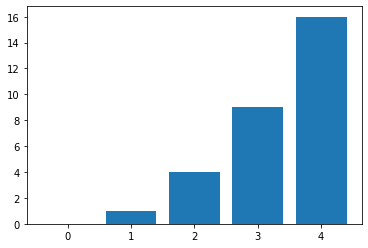

In [2]:
def bar_chart_example(x, y):
    plt.figure()
    plt.bar(x, y)
    plt.show()
    
# back to y=x^2
x = list(range(5))
y = [value ** 2 for value in x]
bar_chart_example(x, y)

## Pie Charts

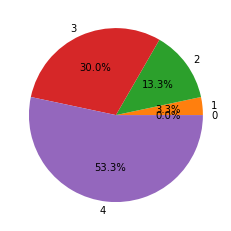

In [3]:
def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    
pie_chart_example(x, y)

## Histograms

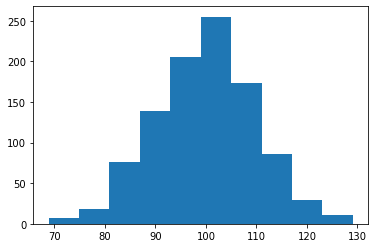

In [4]:
def histogram_example(data):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data, bins=10) # default is 10
    plt.show()
    
# let's generate some random "normal" data
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)
histogram_example(normal_data)

## Box Plots

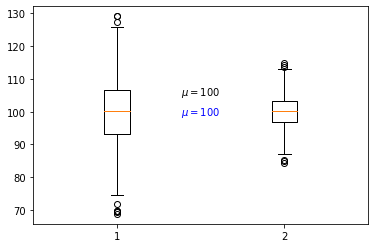

In [5]:
def box_plot_example(distributions):
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate("$\mu=100$", xy=(1.5, 105), xycoords="data", horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")

    plt.show()
    
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
box_plot_example([normal_data, normal_data2])

In [6]:
import utils

import importlib
importlib.reload(utils)

header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [
    ["ford pinto", 75, 2769],
    ["toyota corolla", 75, 2711],
    ["ford pinto", 76, 3025],
    ["toyota corolla", 77, 2789],
    ["ford pinto", 76, 2719],
    ["toyota corolla", 77, 4711],
    ["ford pinto", 76, 3055],
    ["toyota corolla", 77, 3789],
]

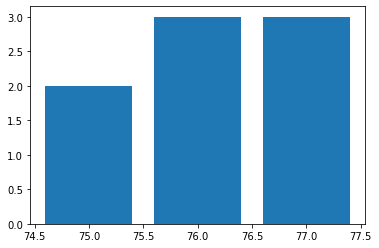

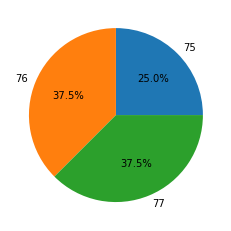

In [7]:
# Task: Make a bar chart / pie cjart for the model year counts we computed with get_frequencies()
# first we need to get the data
x,y = utils.get_frequencies(msrp_table, header, "ModelYear")

# Bar
bar_chart_example(x,y)

# Pie
pie_chart_example(x,y)

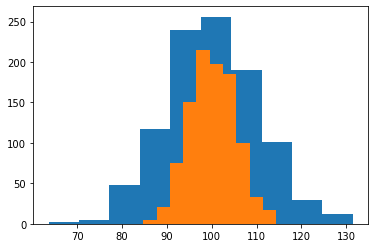

In [8]:
def histogram_example(data,data2):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data, bins=10) # default is 10
    plt.hist(data2)
    plt.show()
    

mean = 100 # (mu)
stdev = 10 # (sigma)
num_samples = 1000 

normal_data = np.random.normal(mean, stdev, num_samples)
normal_data2 = np.random.normal(mean, (stdev / 2), num_samples)

histogram_example(normal_data, normal_data2)

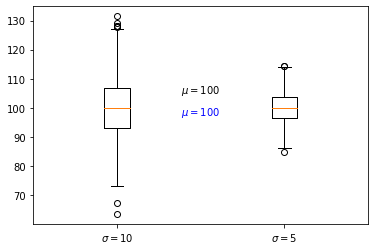

In [9]:
# box plot time
def box_plot_example(distributions,labels): # labels is a 1D list of the lables
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate("$\mu=100$", xy=(1.5, 105), xycoords="data", horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")
    
    plt.xticks(list(range(1,len(distributions)+1)), labels)

    plt.show()
    
box_plot_example([normal_data,normal_data2], ["$\sigma=10$","$\sigma=5$"])

[75, 76, 77]
[[['ford pinto', 75, 2769], ['toyota corolla', 75, 2711]], [['ford pinto', 76, 3025], ['ford pinto', 76, 2719], ['ford pinto', 76, 3055]], [['toyota corolla', 77, 2789], ['toyota corolla', 77, 4711], ['toyota corolla', 77, 3789]]]


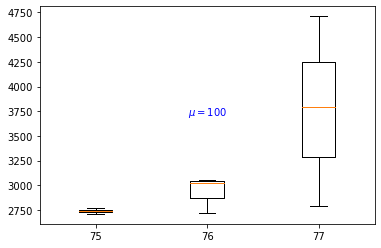

In [10]:
importlib.reload(utils)

modelyear_names, modelyear_subtables = utils.group_by(msrp_table, header, "ModelYear")
print(modelyear_names)
print(modelyear_subtables)

msrp_dists = []
for subtable in modelyear_subtables:
    msrp_dists.append(utils.get_column(subtable, header, "MSRP"))

box_plot_example(msrp_dists, modelyear_names) # modelyear_names is paralell to msrp_dists

## Discretization
Converting a numeric (continuous) attribute to a categorical (discrete)
* A few ways to do this
    * we will go over equal widths binning
    * Define N + 1 cutoffs (where N is the number of bins and a cutoff separates bins)
        * because `plt.hist()` and `np.histogram()` both use N + 1 cutoffs
        * the first and the last cutoffs are the min and max respectively 
        * each bin is "half open" (e.g. `[ , )`) except the last bin (closed)

[9, 12, 21, 36, 39, 44, 46, 47, 58, 64, 65, 67, 67, 70, 83, 87, 87, 88, 88, 88]
plt_freqs: [3. 2. 3. 6. 6.]
plt_cutoffs: [ 9.  24.8 40.6 56.4 72.2 88. ]


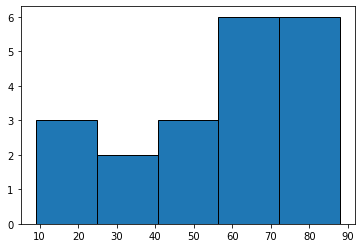

In [11]:
# we need some data
np.random.seed(0)
values = np.random.choice(100,20) # 20 random samples with replacement from [0,100)
values = sorted(list(values))
print(values)
# discretizing values into 5 bins
plt_freqs, plt_cutoffs, plt_artists = plt.hist(values, bins=5, edgecolor="black") # this is returning the frequencies of each bin, the cutoffs and the artists
print("plt_freqs:", plt_freqs)
print("plt_cutoffs:", plt_cutoffs)

# Discretization Lab

1. Given a list of values and the number of equal-width bins to create (N), write a function to return a list of the N + 1 cutoff points.
1. Given a list of values and a list of N + 1 cutoff points, write a function to return the corresponding frequencies of the N bins.
1. Given a list of the N bins and the N frequencies of the bins, write a function to produce a histogram that matches that produced with the same data by plt.hist()

In [12]:
# 1.
importlib.reload(utils)
cutoffs = utils.compute_equal_width_cutoffs(values, 5)
print(cutoffs)
# assert time
assert np.allclose(cutoffs, plt_cutoffs)

[9.0, 24.8, 40.6, 56.4, 72.2, 88]


In [13]:
# 2. 
importlib.reload(utils)
freqs = utils.compute_bin_frequencies(values, cutoffs)
print(freqs)
assert np.allclose(freqs, plt_freqs)

[3, 2, 3, 6, 6]


<BarContainer object of 5 artists>

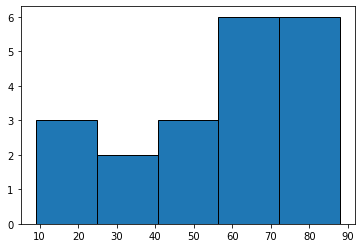

In [14]:
# 3. 
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1]-cutoffs[0]), edgecolor="black", align="edge")

## Linear Regression
* suppose we have x and y data, x is an independent variable and y is a dependent variable
* we want to fit a line between x and y
* recall: y = mx + b
* we will use the "least squares" approach (for simple linear regression e.g. univariate)
    * the line has to pass through (meanx, meany)
    * the formula for m (slope)
    * solve for b (intercept)  

Manual slope: 1.924917458430444
Manual intercept: 5.211786196055144
Scipy slope: 1.9249174584304443
Scipy intercept: 5.2117861960551295


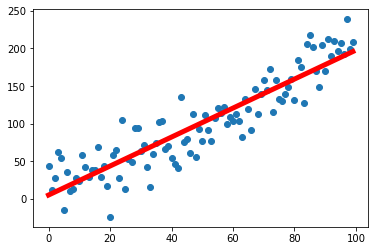

In [99]:
import scipy.stats as stats
importlib.reload(utils)

np.random.seed(0)
x = list(range(0, 100))
y = [value * 2 + np.random.normal(0, 25) for value in x]

m, b = utils.compute_slope_intercept(x, y)

sp_m, sp_b, sp_r, sp_r_pval, sp_std_err = stats.linregress(x, y)

print("Manual slope:", m)
print("Manual intercept:", b)
print("Scipy slope:", sp_m)
print("Scipy intercept:", sp_b)

assert np.isclose(m, sp_m)  # actual (our val) vs expected (sol)
assert np.isclose(b, sp_b)

plt.plot(x, y, "o")
plt.plot([min(x), max(x)],[m*min(x) + b, m*max(x) + b],c="r",lw=5) # min(x), max(x) are the two x values that we KNOW, the rest is the equation

## Quantifying the Strength of a Linear Relationship 
* See U3/Linear Regression notes on GitHub for formulas
* Some metrics
    * Covariance
    * Correlation
    * Standard error
        * Mean of the deviations from each point to the fit line
    * Mean absolute error (MAE)
        * Mean of the absolute values of the differences between each point and the line (Residuals)
            * Residuals
                * A residual is the ABS difference between a point and the line vertically
    * Root mean squared error (RMSE)
        * Squares the difference (This will make the outliers have much more of an impact)
* Focus on Correlation
    * $r$ is value u `[-1.0,1.0]`
    * 1.0 means perfect linear relationship; x increases, so does y; vice versa
    * -1.0 means perfect inverse linear relationship; as x increases, y decreases; vice versa
    * 0.0 means there is no (linear) relationship; x and y are independent 
    * **NOTE**: Correlation does not imply causation
